In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

wordnet_lemmatizer=WordNetLemmatizer()

In [2]:
titles=[line.strip() for line in open('all_book_titles.txt')]

In [3]:
stopwords= set(w.strip() for w in open('stopwords.txt'))

In [4]:
# add more stopwords specific to this problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [5]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens

In [23]:
word_index_map={}
current_index=0
all_tokens=[]
all_titles=[]
index_word_map=[]

for title in titles:
    
    #title=title.encode('ascii','ignore')
    #print(title)
    all_titles.append(title)
    tokens=my_tokenizer(title)
    all_tokens.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token]=current_index
            current_index +=1
            index_word_map.append(token)
    

In [24]:
def tokens_vector(tokens):
    x=np.zeros(len(word_index_map))
    for t in tokens:
        i=word_index_map[t]
        x[i] =1
   
    return x

In [25]:
N= len(all_tokens)
D=len(word_index_map)
X=np.zeros((D,N))
i=0

In [26]:
for tokens in all_tokens:
    X[:,i]=tokens_vector(tokens)
    i +=1

In [27]:
D

2072

In [28]:
svd=TruncatedSVD()
Z=svd.fit_transform(X)

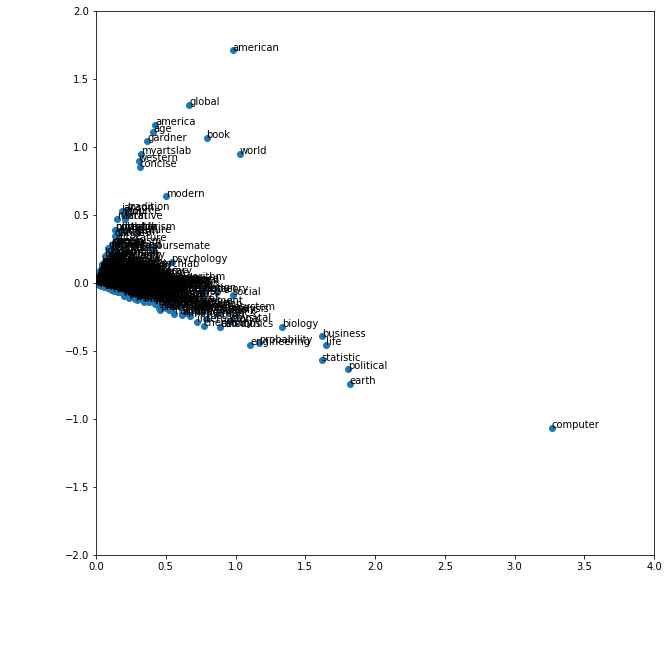

In [32]:
plt.figure(figsize=[10,10])
plt.axis([0,4,-2,2])
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
